In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Physical parameters

In [2]:
delay=239.6e-9
tau_L = 1 / (12.5e9*2*np.pi)
tau_H = 1/ (0.625e6*2*np.pi)
beta = 1
kappa = 0.9
phi_0 = -0.25*np.pi
parameters = [tau_L,tau_H,beta,kappa,phi_0]

### Simulation parameters

In [3]:
deltat = 1e-11
T = 1e-5
ntau = int(np.floor(delay/deltat))
nT = int(np.floor(T/deltat))

### Initialize state vectors with initial conditions

In [4]:
# Initialise state vectors
X = np.zeros(nT)
Y = np.zeros(nT)

# Initial conditions
X[0:ntau] = 0.01*np.random.normal(loc=0.0, scale=1.0, size=(ntau))
Y[0:ntau] = 0.01*np.random.normal(loc=0.0, scale=1.0, size=(ntau))

In [5]:
def fnlx(x,y,xtau,parameters):
    tau_L = parameters[0]
    tau_H = parameters[1]
    beta = parameters[2]
    kappa = parameters[3]
    phi_0 = parameters[4]
    return -(1/tau_L+1/tau_H)*x - y/tau_L + beta/tau_L*(np.cos(kappa*xtau+phi_0))**2

def fnly(x,parameters):
    tau_H = parameters[1]
    return 1/tau_H*x


for n in range(ntau,nT-1):
    X[n+1] = X[n] + deltat*fnlx(X[n],Y[n],X[n-ntau],parameters)
    Y[n+1] = Y[n] + deltat*fnly(X[n],parameters)

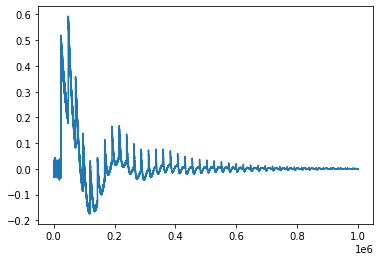

In [6]:
plt.plot(X)

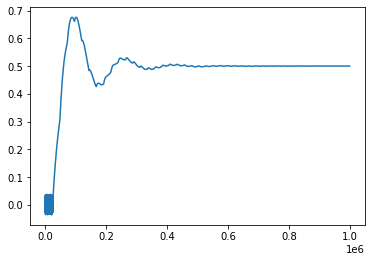

In [7]:
plt.plot(Y)